### Analysis of networks generated from the Bianconi-Barabasi model

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

import model


#### General parameters

In [2]:
n = 10000 # Number of nodes
m = 2 # Number of links for new nodes
m0 = 3 # Initial number of nodes

#### Network generated with a delta fitness distribution (BA model)

In [3]:
# Initialization
network_delta = model.network(m0, m)
network_delta.set_fitness_distr('delta')

In [4]:
# Generate the network
network_delta.generate_network(n)

# Get the degree distribution of the network
p_k_delta, k_delta = network_delta.get_degree_distr()

In [5]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_delta = np.delete(k_delta, np.argwhere(p_k_delta==0))
y_delta = np.delete(p_k_delta, np.argwhere(p_k_delta==0))
# Transform to log scale
x_delta = np.log10(x_delta)
y_delta = np.log10(y_delta)

# Linear regression (slope is the exponent)
slope_delta, intercept_delta, r_value_delta, _, _ = linregress(x_delta, y_delta)

print('The power law exponent of the degree distribution using a delta fitness distribution is %s'% np.round(-slope_delta, 3))


The power law exponent of the degree distribution using a delta fitness distribution is 2.778


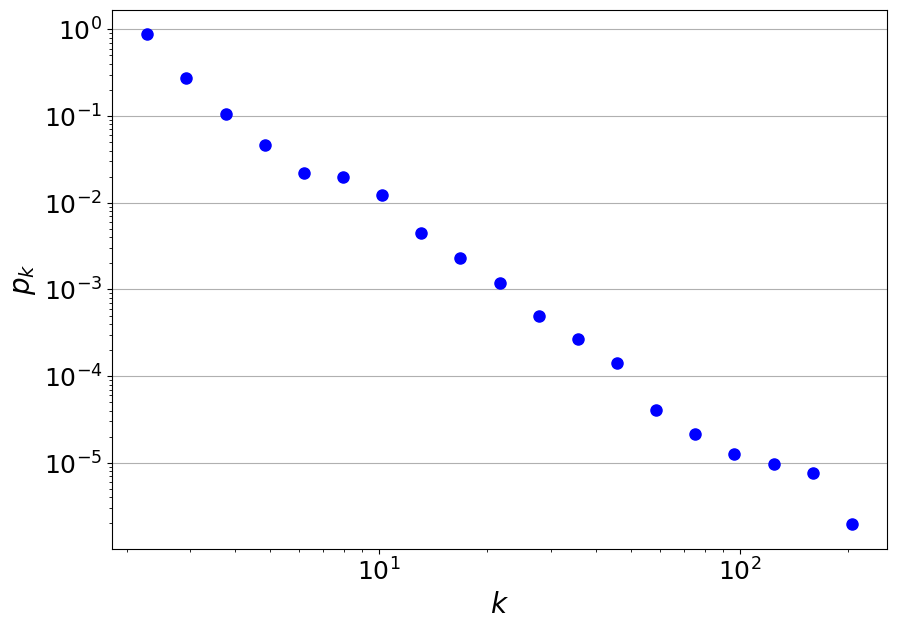

In [6]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_delta, p_k_delta, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()


#### Network generated with a uniform fitness distribution

In [7]:
# Initialization
network_uniform = model.network(m0, m)
network_uniform.set_fitness_distr('uniform')

In [8]:
# Generate the network
network_uniform.generate_network(n)

# Get the degree distribution of the network
p_k_uniform, k_uniform = network_uniform.get_degree_distr()

In [9]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_uniform = np.delete(k_uniform, np.argwhere(p_k_uniform==0))
y_uniform = np.delete(p_k_uniform, np.argwhere(p_k_uniform==0))
# Transform to log scale
x_uniform = np.log10(x_uniform)
y_uniform = np.log10(y_uniform)

# Linear regression (slope is the exponent)
slope_uniform, intercept_uniform, r_value_uniform, _, _ = linregress(x_uniform, y_uniform)

print('The power law exponent of the degree distribution using a uniform fitness distribution is %s'% np.round(-slope_uniform, 3))

The power law exponent of the degree distribution using a uniform fitness distribution is 2.47


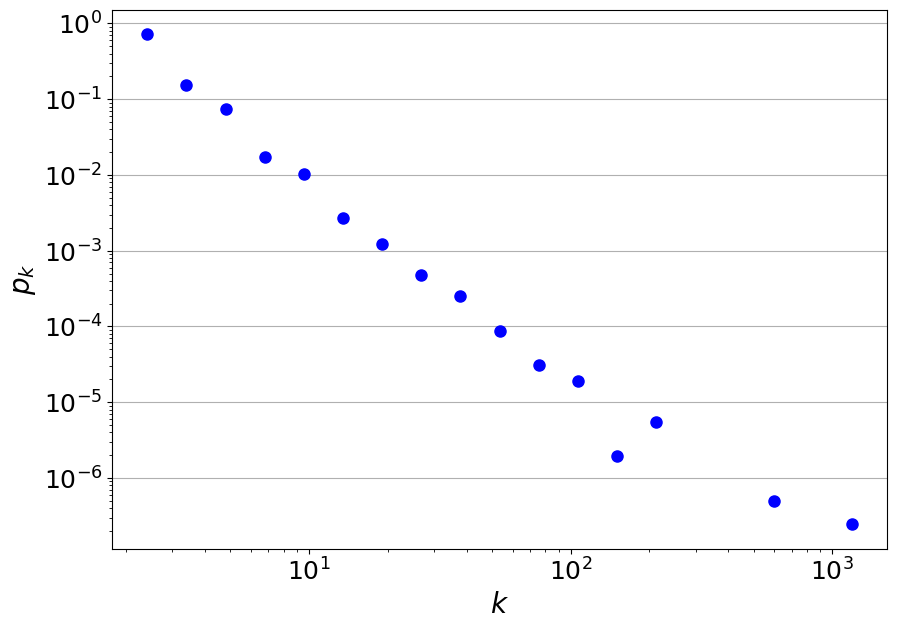

In [10]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_uniform, p_k_uniform, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

#### Network generated with an exponential fitness distribution

In [11]:
# Initialization
network_exp = model.network(m0, m)
network_exp.set_fitness_distr('exponential')

In [12]:
# Generate the network
network_exp.generate_network(n)

# Get the degree distribution of the network
p_k_exp, k_exp = network_exp.get_degree_distr()

In [13]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_exp = np.delete(k_exp, np.argwhere(p_k_exp==0))
y_exp = np.delete(p_k_exp, np.argwhere(p_k_exp==0))
# Transform to log scale
x_exp = np.log10(x_exp)
y_exp = np.log10(y_exp)

# Linear regression (slope is the exponent)
slope_exp, intercept_exp, r_value_exp, _, _ = linregress(x_exp, y_exp)

print('The power law exponent of the degree distribution using a exponential fitness distribution is %s'% np.round(-slope_exp, 3))


The power law exponent of the degree distribution using a exponential fitness distribution is 2.258


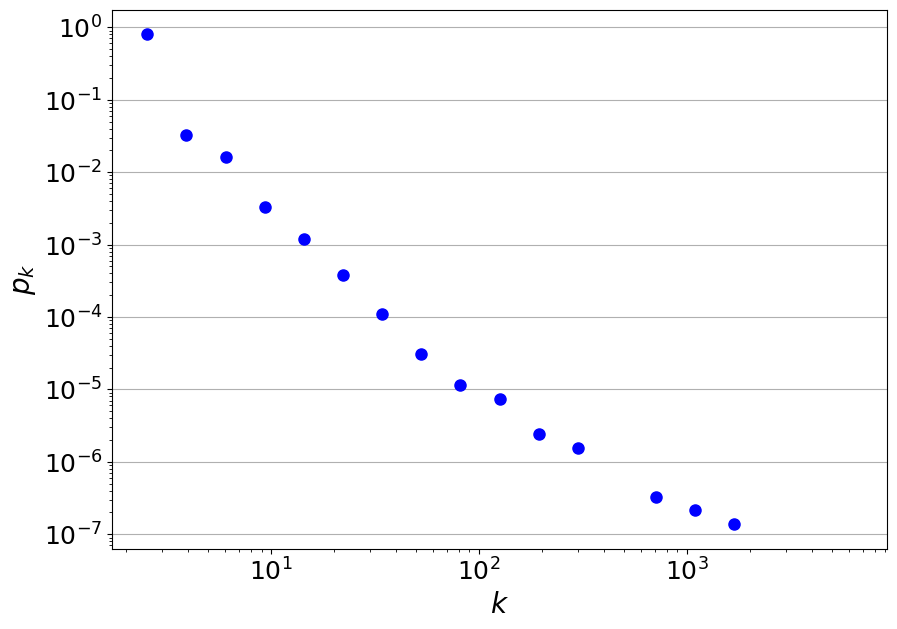

In [14]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_exp, p_k_exp, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

#### Comparison of degree distribution

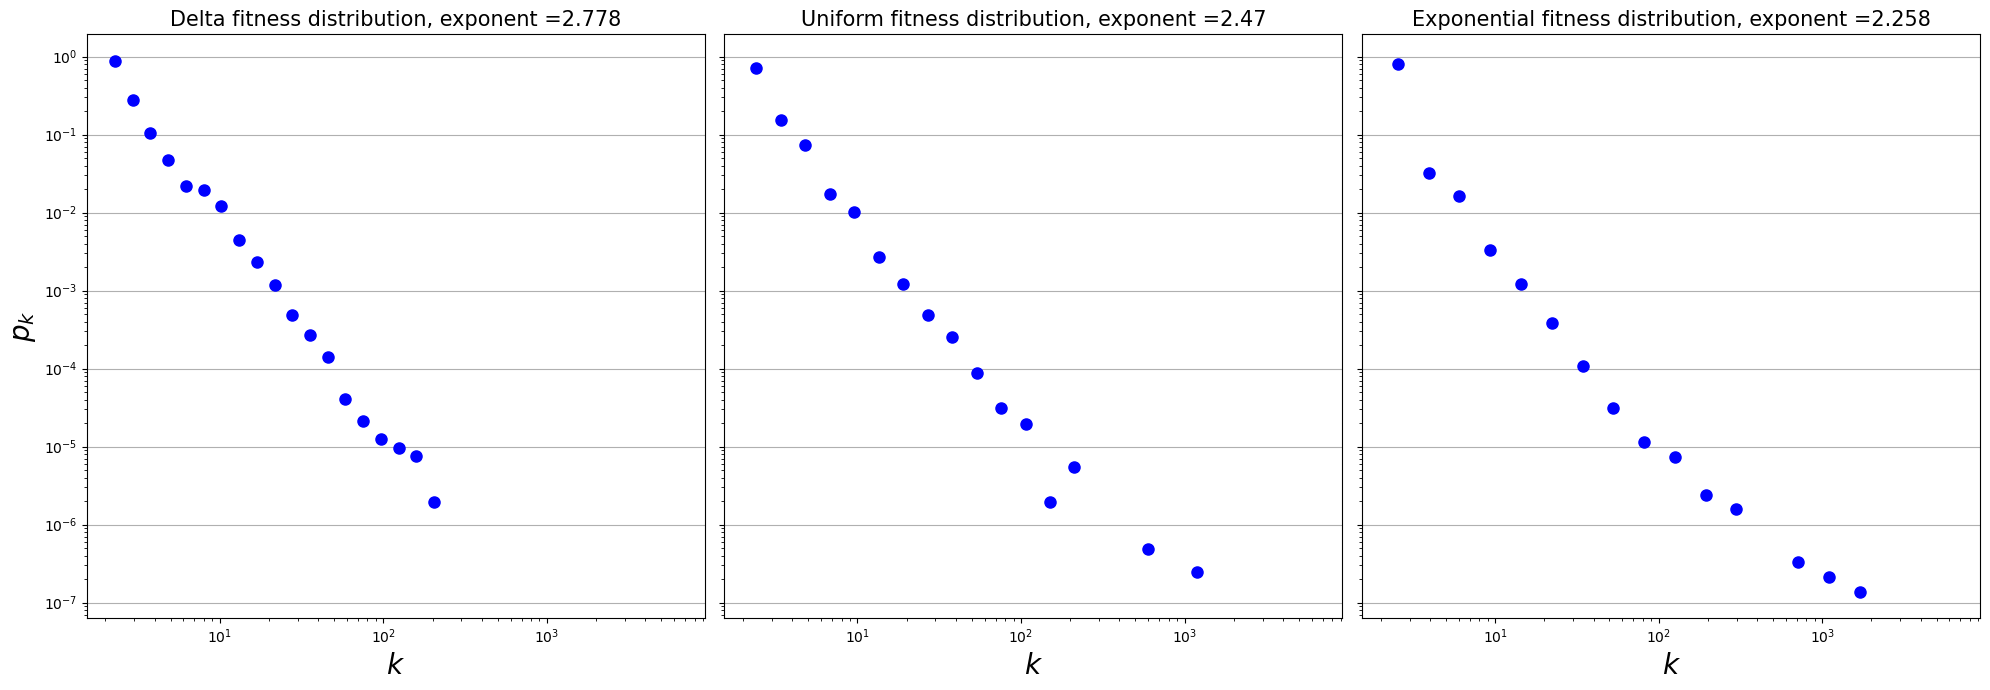

In [29]:
fig, axs = plt.subplots(1,3, figsize = (20,7), sharex=True, sharey=True)

axs[0].set_title('Delta fitness distribution, exponent ='+ str(round(-slope_delta, 3)), fontsize=15)
axs[0].loglog(k_delta, p_k_delta, 'bo', markersize=8)
axs[0].set_ylabel('$p_k$', fontsize=20)
axs[0].set_xlabel('$k$', fontsize=20)

axs[1].set_title('Uniform fitness distribution, exponent ='+ str(round(-slope_uniform, 3)), fontsize=15)
axs[1].loglog(k_uniform, p_k_uniform, 'bo', markersize=8)
axs[1].set_xlabel('$k$', fontsize=20)

axs[2].set_title('Exponential fitness distribution, exponent ='+ str(round(-slope_exp, 3)), fontsize=15)
axs[2].loglog(k_exp, p_k_exp, 'bo', markersize=8)
axs[2].set_xlabel('$k$', fontsize=20)

for ax in axs.flat:
    ax.yaxis.grid(True)

plt.tight_layout()
plt.show()